# Part 2

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

X, y = mnist["data"], mnist["target"]

X = X.to_numpy()
y = y.astype(np.uint8)

Get training and testing data from MNIST dataset

In [97]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Create a class that will separate the data into 3v5, 3vOther, 5vOther; as well as train the three different classifiers on this data

In [98]:
from sklearn.linear_model import SGDClassifier
import random


class SGD_3v5vO_clf:
    X_train = None
    X_train_3v5 = None

    y_train = None
    y_train_3v5_3 = None
    y_train_3vO_3 = None
    y_train_5vO_5 = None

    loss_method = "log_loss"

    sgd_3v5_clf = SGDClassifier(random_state=42, loss=loss_method)
    sgd_3vO_clf = SGDClassifier(random_state=42, loss=loss_method)
    sgd_5vO_clf = SGDClassifier(random_state=42, loss=loss_method)

    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

        y_train_3v5 = y_train[(y_train == 3) | (y_train == 5)]

        self.y_train_3v5_3 = y_train_3v5 == 3
        self.X_train_3v5 = X_train[(y_train == 3) | (y_train == 5)]

        self.y_train_3vO_3 = y_train == 3
        self.y_train_5vO_5 = y_train == 5

    def fit(self):
        self.sgd_3v5_clf.fit(self.X_train_3v5, self.y_train_3v5_3)
        self.sgd_3vO_clf.fit(self.X_train, self.y_train_3vO_3)
        self.sgd_5vO_clf.fit(self.X_train, self.y_train_5vO_5)

    def predict(self, X):
        three = 0
        five = 0
        other = 0

        if self.sgd_3v5_clf.predict(X)[0]:
            three += 1
        else:
            five += 1

        if self.sgd_5vO_clf.predict(X)[0]:
            five += 1
        else:
            other += 1

        if self.sgd_3vO_clf.predict(X)[0]:
            three += 1
        else:
            other += 1

        if three == five == other:
            return random.choice(["3", "5", "Other"])

        elif three == 2:
            return "3"
        elif five == 2:
            return "5"
        else:
            return "Other"


In [99]:
multi_clf = SGD_3v5vO_clf(X_train, y_train)
multi_clf.fit()

Demonstration of the Predict function

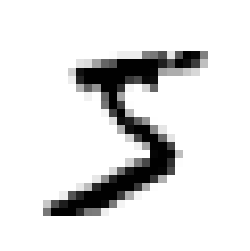

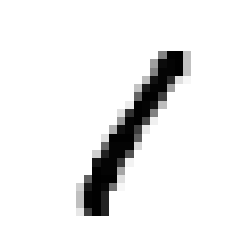

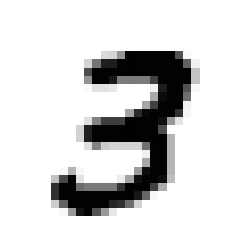

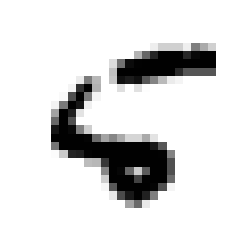

In [100]:
digit_5 = X[0]
digit_0 = X[3]
digit_3 = X[7]
question_digit = X_test[8]

all_digits = [digit_5, digit_0, digit_3, question_digit]

for digit in all_digits:
    digit_image = digit.reshape(28,28)
    plt.figure(figsize=(3,3))
    plt.imshow(digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

In [101]:
for digit in all_digits:
    print(f"Prediction: {multi_clf.predict(np.reshape(digit, (1,-1)))}")



Prediction: 5
Prediction: Other
Prediction: 3
Prediction: Other
